# How does convolutions work?

Let's explore how `convolutions` work by creating a basic convolution on a 2D Grey Scale image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

Loading the image by taking the `ascent` image from `scipy`. It's a nice, built-in picture with lots of angles and lines.

In [2]:
# Image data
img = misc.ascent()

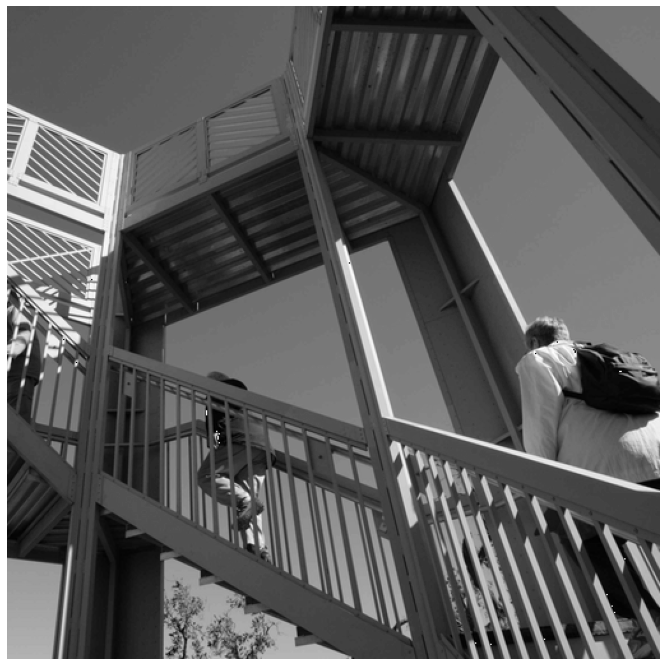

In [3]:
def plot_img(img, plt_axis='on'):
    plt.figure(figsize=(12, 12))
    plt.grid(False)
    plt.gray()
    plt.axis(plt_axis)
    plt.imshow(img)
    plt.show()
    
    
plot_img(img, plt_axis='off')

The image is stored as a `numpy array`, so we can create the `transformed image` by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [4]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

print(size_x, size_y)

512 512


Now we can create a `filter` as a 3x3 array.

In [5]:
# This filter detects edges nicely, it creates a convolution that only passes 
# through sharp edges and straight lines.
filter_1 = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

# Experiment with different values for fun effects.
filter_2 = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter_3 = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

If all the digits in the filter don't add up to `0 or 1`, you should probably do a `weight` to get it to do so, for example, if your weights are 1, 1, 1, 1, 2, 1, 1, 1, 1. They add up to 10, so you would set a weight of .1 if you want to `normalize` them.

In [6]:
weight = 1

Now let's create a `convolution`. We will iterate over the image, `leaving a 1 pixel margin`, and multiply out each of the neighbors of the current pixel by the value defined in the filter.  i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255. Finally we'll load the new value into the `transformed image`. 

In [7]:
def apply_filter(img, filter, img_transformed, size_x, size_y):
    for x in range(1, size_x - 1):
        for y in range(1, size_y - 1):
            convolution = 0.0
            convolution = convolution + (img[x - 1, y - 1] * filter[0][0])
            convolution = convolution + (img[x, y - 1] * filter[0][1])
            convolution = convolution + (img[x + 1, y - 1] * filter[0][2])
            convolution = convolution + (img[x - 1, y] * filter[1][0])
            convolution = convolution + (img[x, y] * filter[1][1])
            convolution = convolution + (img[x + 1, y] * filter[1][2])
            convolution = convolution + (img[x - 1, y + 1] * filter[2][0])
            convolution = convolution + (img[x, y + 1] * filter[2][1])
            convolution = convolution + (img[x + 1, y + 1] * filter[2][2])
            convolution = convolution * weight
            if (convolution < 0):
                convolution = 0
            if (convolution > 255):
                convolution = 255
            img_transformed[x, y] = convolution
            
    return img_transformed

In [8]:
img_transformed_1 = apply_filter(img, filter_1, np.copy(img_transformed), size_x, size_y)
img_transformed_1

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,   1,   0, ...,   0,   0, 117],
       [ 80,   3,   0, ...,   0,   0, 117],
       ...,
       [178,   0,   0, ...,   2,   0,  57],
       [178,   0,   0, ...,   0,   1,  57],
       [178, 178, 178, ...,  57,  57,  58]])

Now we can plot the image to see the `effect` of the convolution!

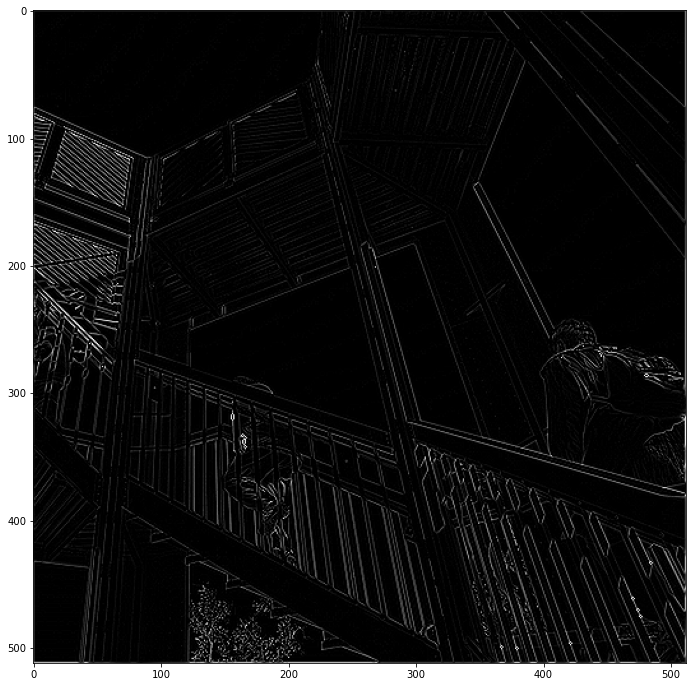

In [9]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plot_img(img_transformed_1)

**Vertical lines filter**

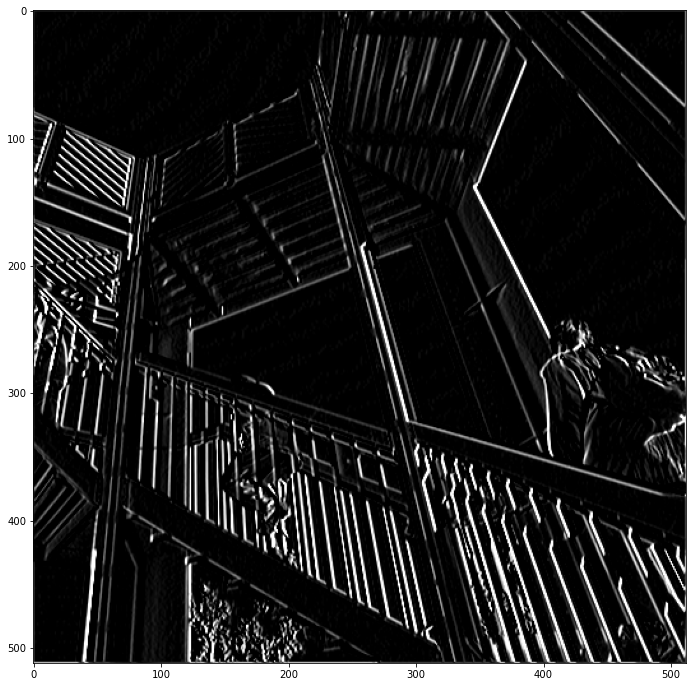

In [10]:
img_transformed_2 = apply_filter(img, filter_2, np.copy(img_transformed), size_x, size_y)
plot_img(img_transformed_2)

**Horizontal lines filter**

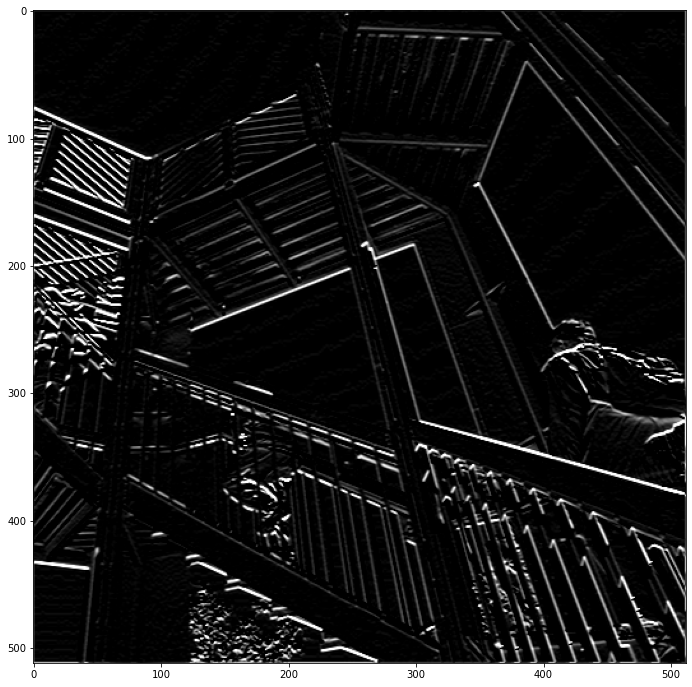

In [11]:
img_transformed_3 = apply_filter(img, filter_3, np.copy(img_transformed), size_x, size_y)
plot_img(img_transformed_3)

This code will show a (2, 2) `pooling` - `max pooling`. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbours to the right, beneath, and right-beneath. Take the `largest of them` and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the `features get maintained despite this compression`!

In [12]:
def apply_max_pooling(img_transformed, size_x, size_y):
    # Using transformed img as pooling is applied after conv layer
    
    new_x = int(size_x / 2)
    new_y = int(size_y / 2)
    newImage = np.zeros((new_x, new_y))
    for x in range(0, size_x, 2):
        for y in range(0, size_y, 2):
            pixels = []
            pixels.append(img_transformed[x, y])
            pixels.append(img_transformed[x + 1, y])
            pixels.append(img_transformed[x, y + 1])
            pixels.append(img_transformed[x + 1, y + 1])
            newImage[int(x / 2), int(y / 2)] = max(pixels)
            
    return newImage

In [13]:
new_img = apply_max_pooling(np.copy(img_transformed_1), size_x, size_y)
new_img

array([[ 83.,  83.,  83., ..., 117., 117., 117.],
       [ 82.,   1.,   0., ...,   0.,   0., 117.],
       [ 83.,   1.,   5., ...,   0.,   0., 117.],
       ...,
       [176.,   3.,   4., ...,   0.,   7., 136.],
       [178.,   0.,   0., ...,  56.,   5.,  64.],
       [178., 178., 178., ...,  30.,  57.,  58.]])

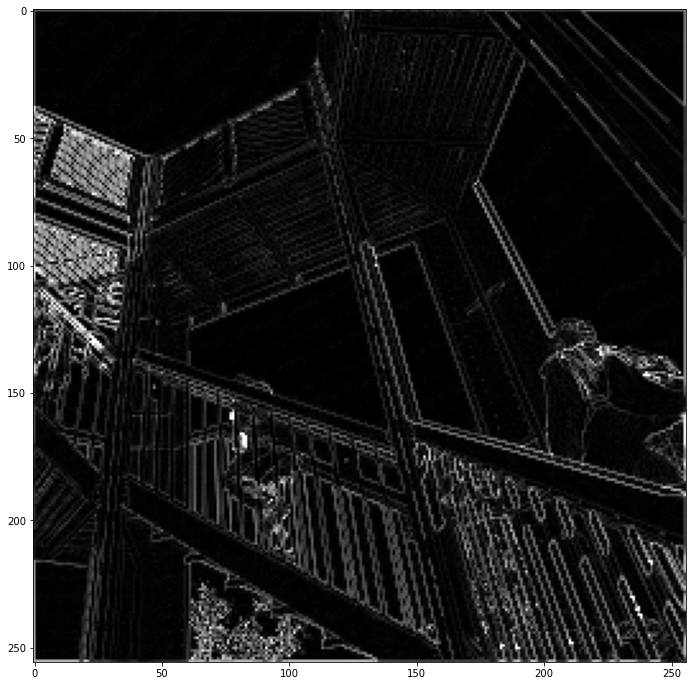

In [14]:
plot_img(new_img)

---